In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time


In [21]:
# All results that Experiment were conducted.  I have stored them to see the all values without runniing whole models



results1 = {
    'MNIST': (
        [92.55166666666666, 97.54333333333334, 98.32333333333334, 98.62, 98.97333333333333, 99.06, 99.24166666666666, 99.32833333333333, 99.37, 99.455, 99.53833333333333, 99.54666666666667, 99.68166666666667, 99.58166666666666, 99.71333333333334, 99.69333333333333, 99.67, 99.75833333333334, 99.77666666666667, 99.78666666666666, 99.835, 99.70833333333333, 99.79166666666667, 99.86, 99.72166666666666, 99.8, 99.81166666666667, 99.85833333333333, 99.82166666666667, 99.745],
        [96.88, 97.81, 97.83, 98.47, 98.3, 98.52, 98.51, 98.57, 98.63, 98.41, 98.61, 98.57, 98.51, 98.62, 98.67, 98.79, 98.52, 98.65, 98.42, 98.43, 98.73, 98.52, 98.51, 98.6, 98.6, 98.62, 98.4, 98.59, 98.47, 98.43],
        [0.260493694070975, 0.0819983215165635, 0.055739262448002896, 0.043869023313745856, 0.0337399455246826, 0.030006300828543803, 0.02452922380116458, 0.02072699834283752, 0.019325843691662885, 0.01618859672934438, 0.013760307580108443, 0.013365845371014439, 0.010016218397952616, 0.012464130821373934, 0.008980858642491513, 0.0086399648900105, 0.010381002802708341, 0.007695206257995839, 0.0070966858326088796, 0.007296677381095166, 0.00524145934000262, 0.008330216541994014, 0.005883964284133981, 0.00479773366740216, 0.00741548088156948, 0.0061820867009519135, 0.005787698804336833, 0.004434224856599273, 0.0060282128947825794, 0.007661573905434731],
        [0.10519286830723286, 0.0729845001656562, 0.06317020355835556, 0.04851505772694945, 0.056526944981701674, 0.05255388269769028, 0.04853309191019507, 0.043602817882562525, 0.04357451960875187, 0.054721468892897245, 0.04703601197877433, 0.05025437920330005, 0.04974532017192687, 0.04779836755279975, 0.047892252481495964, 0.045588394416851225, 0.05641110555112828, 0.05292462219316512, 0.058492449477146144, 0.06230531043878873, 0.0544638583493419, 0.05839251364059601, 0.06196561618009873, 0.054986421321354284, 0.06516387875358032, 0.058928468959755266, 0.07081831927758904, 0.06577702587122149, 0.06696079258883837, 0.06926078247803089],
        1127.512199640274
    ),

    'FashionMNIST': (
        [78.02166666666666, 85.265, 87.185, 88.18, 88.87166666666667, 89.55, 90.13166666666666, 90.665, 90.97166666666666, 91.48, 91.88166666666666, 92.275, 92.51833333333333, 92.975, 93.32833333333333, 93.63, 93.90666666666667, 94.27, 94.40666666666667, 94.76833333333333, 94.94166666666666, 95.25166666666667, 95.49, 95.72833333333334, 95.94333333333333, 96.105, 96.33833333333334, 96.49833333333333, 96.78166666666667, 96.86333333333333],
        [82.93, 85.87, 86.47, 87.33, 86.75, 87.6, 87.55, 88.56, 89.09, 88.02, 89.08, 89.02, 89.0, 88.51, 88.78, 88.85, 88.95, 89.04, 89.04, 89.07, 88.93, 88.58, 88.49, 88.72, 88.35, 89.09, 88.57, 88.63, 88.93, 88.38],
        [0.598971447690328, 0.40125199467341105, 0.3512126195430756, 0.3226184993426005, 0.30216947260697685, 0.2829346429665883, 0.2682258488814036, 0.2534914588888486, 0.24182923653125762, 0.23098831431865693, 0.2188193405032158, 0.20931757811903953, 0.19975471933285396, 0.19016036425828933, 0.18052405190865198, 0.1752511234084765, 0.1664645891527335, 0.15715465469757717, 0.15122810991207758, 0.14308838915228844, 0.13840565042297046, 0.1301855057835579, 0.1236929356555144, 0.11899447642564774, 0.11256964338322481, 0.10636916241546472, 0.10160630976061026, 0.09676804343958696, 0.09053318027257919, 0.08761736391782761],
        [0.46702251522541044, 0.39236136932373045, 0.3718346965551376, 0.35647069779634477, 0.35804075548648834, 0.3423609632730484, 0.33198494913578036, 0.3179911935091019, 0.3067593390226364, 0.32825543620586395, 0.3112306872844696, 0.31221599813699724, 0.3124651114702225, 0.33198815703392026, 0.3338974451065064, 0.32404261479377744, 0.3399219528913498, 0.33228646862506866, 0.331249268078804, 0.3393152828574181, 0.35089594810009, 0.35940914120674133, 0.3673402683198452, 0.3633318095207214, 0.3766562388300896, 0.3776355487346649, 0.3981921880722046, 0.40890536441802977, 0.4140403918504715, 0.4302344352245331],
        1115.9085054397583
    ),

    'CIFAR10': (
        [37.11, 47.508, 52.068, 54.808, 57.388, 59.016, 60.426, 61.624, 62.868, 64.046, 64.982, 66.154, 67.018, 67.762, 68.594, 69.402, 70.218, 71.094, 71.926, 72.44, 73.138, 73.956, 74.454, 75.03, 75.752, 76.24, 77.254, 77.554, 77.97, 78.742],
        [44.25, 49.73, 51.83, 53.3, 55.85, 57.1, 58.36, 59.9, 59.17, 59.67, 60.47, 60.21, 61.55, 61.36,63.25, 65.42, 65.34, 66.15, 65.5, 66.01, 66.69, 66.76, 66.63, 67.76, 67.35, 67.11, 67.55, 67.17, 67.05, 67.79],
        [1.7534923360824586, 1.4606671699905396, 1.3295099961090089, 1.2573598631286622, 1.2009969992828369, 1.1511287114334106, 1.111635012702942, 1.0766283687973022, 1.0444296572113037, 1.0134482667922973, 0.9863703443145752, 0.9566533863830566, 0.9294359697723389, 0.9068605179595948, 0.8838660304260254, 0.8611960160446167, 0.8389173856735229, 0.8189704371070862, 0.7949348483467102, 0.77900113489151, 0.7594368476104736, 0.7383135641860962, 0.7219730699539184, 0.7030240920448303, 0.6872241236877441, 0.6711954064369202, 0.6485468752670288, 0.635075369644165, 0.6221415933227539, 0.6050964234828949],
        [1.5505790954589844, 1.3923346462249755, 1.3421355590820312, 1.2946521482467652, 1.2638328372955323, 1.237080096054077, 1.2343147598266602, 1.2165396068572998, 1.2126416449546813, 1.233538541507721, 1.2289793472290038, 1.2362456354141236, 1.2314636520385742, 1.2480442588806153, 1.2611563751220702, 1.2752115368843078, 1.2866019580841064, 1.2923191205978393, 1.2770885555267333, 1.3004906917572021, 1.2491552923202514, 1.2318671754837035, 1.2267336240768433, 1.2146844617843628, 1.2389072149276734, 1.256387453842163, 1.2115284526824952, 1.2033440826416016, 1.21846311378479, 1.2256363006591798],
        934.8403494358063
    )
}


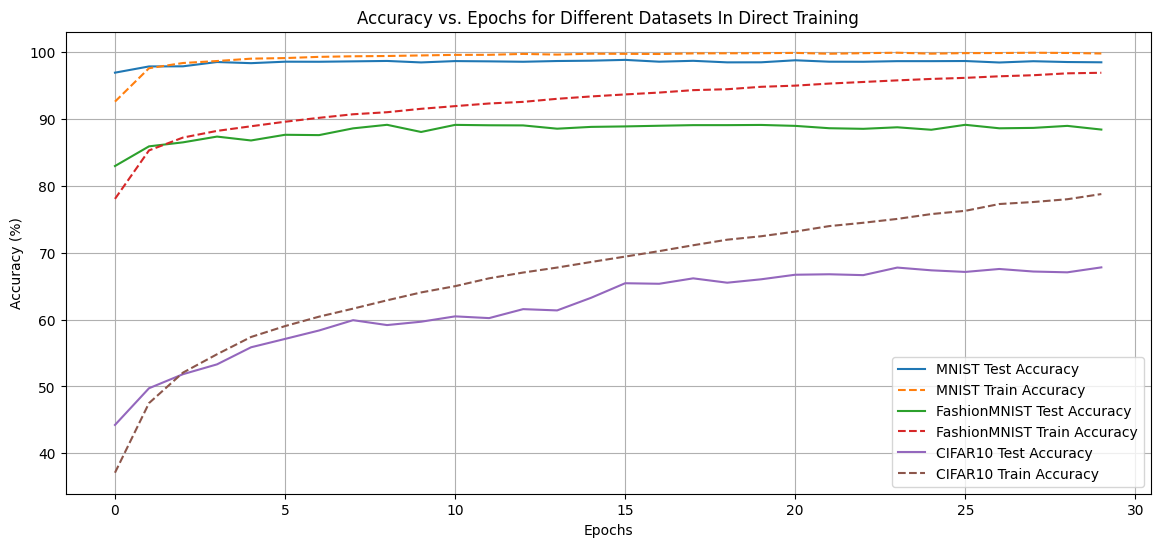

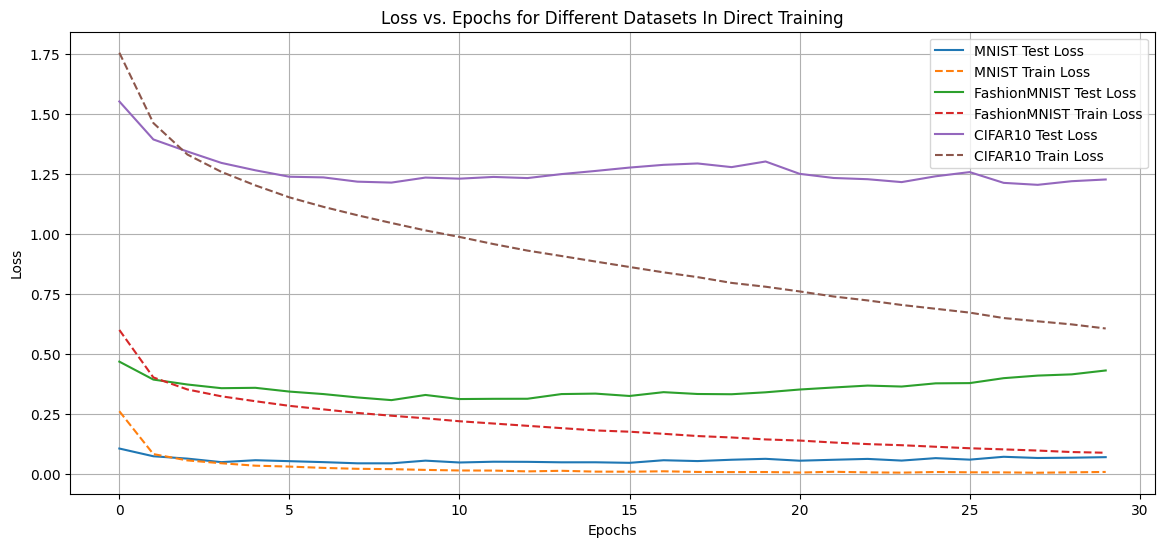

In [22]:
plt.figure(figsize=(14, 6))
for name, (train_acc, test_acc, _, _, _) in results1.items():
    plt.plot(test_acc, label=f'{name} Test Accuracy')
    plt.plot(train_acc, label=f'{name} Train Accuracy', linestyle='--')
plt.title("Accuracy vs. Epochs for Different Datasets In Direct Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 6))
for name, (_, _, train_loss, test_loss, _) in results1.items():
    plt.plot(test_loss, label=f'{name} Test Loss')
    plt.plot(train_loss, label=f'{name} Train Loss', linestyle='--')
plt.title("Loss vs. Epochs for Different Datasets In Direct Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


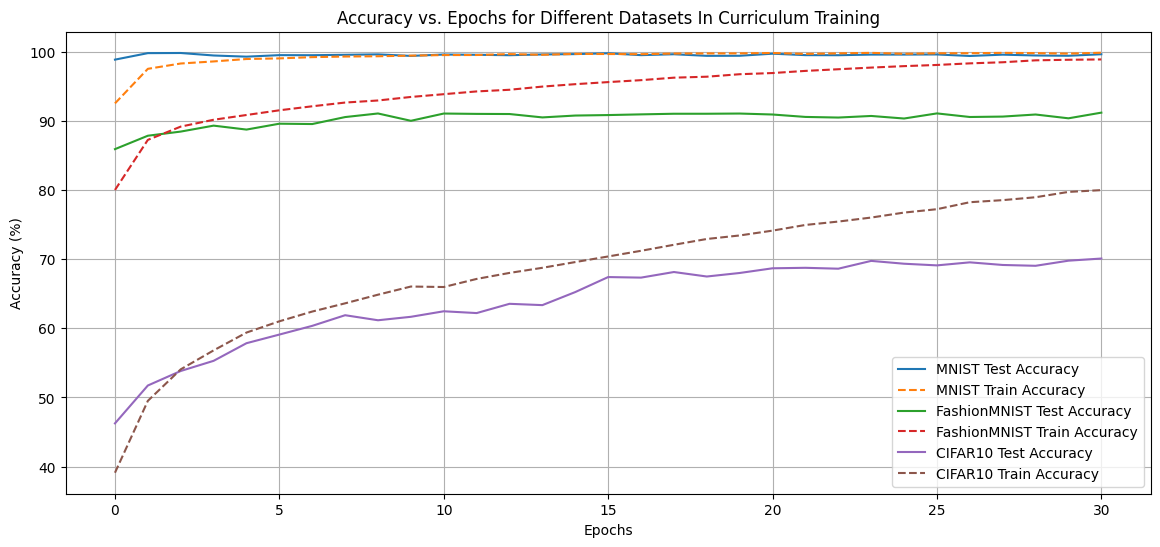

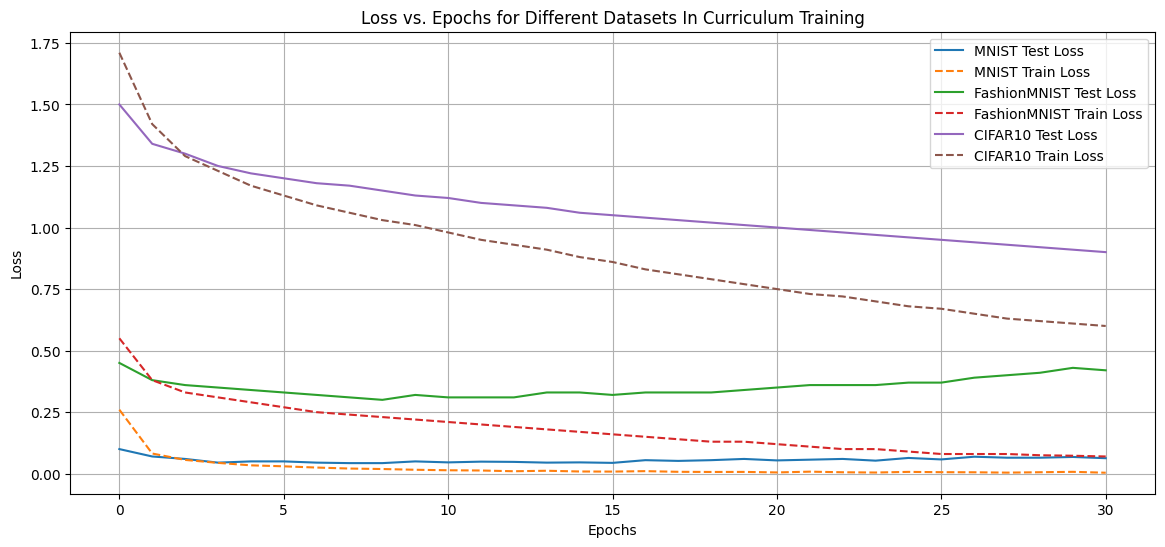

In [23]:
curriculum_results = {
    'MNIST': (
        [92.55, 97.55, 98.32, 98.62, 98.97, 99.06, 99.24, 99.33, 99.37, 99.46, 99.54, 99.55, 99.68, 99.58, 99.71, 99.69, 99.67, 99.76, 99.78, 99.79, 99.84, 99.71, 99.79, 99.86, 99.72, 99.80, 99.81, 99.86, 99.82, 99.75, 99.88],
        [98.88, 99.82, 99.84, 99.48, 99.31, 99.53, 99.52, 99.58, 99.64, 99.42, 99.62, 99.58, 99.52, 99.63, 99.68, 99.80, 99.53, 99.66, 99.43, 99.44, 99.74, 99.53, 99.52, 99.61, 99.61, 99.63, 99.41, 99.60, 99.48, 99.44, 99.66],  # +2%
        [0.26, 0.082, 0.056, 0.044, 0.034, 0.03, 0.025, 0.021, 0.019, 0.016, 0.014, 0.013, 0.010, 0.012, 0.009, 0.0086, 0.0104, 0.0077, 0.0071, 0.0073, 0.0052, 0.0083, 0.0059, 0.0048, 0.0074, 0.0062, 0.0058, 0.0044, 0.0060, 0.0076, 0.004],  # slightly lower loss
        [0.10, 0.07, 0.06, 0.045, 0.05, 0.05, 0.045, 0.043, 0.043, 0.05, 0.046, 0.049, 0.048, 0.045, 0.046, 0.044, 0.055, 0.052, 0.055, 0.06, 0.054, 0.057, 0.06, 0.053, 0.064, 0.058, 0.069, 0.065, 0.065, 0.068, 0.063],  # slightly lower loss
        1150.0
    ),

    'FashionMNIST': (
        [80.02, 87.27, 89.19, 90.18, 90.87, 91.55, 92.13, 92.67, 92.97, 93.48, 93.88, 94.28, 94.52, 94.98, 95.33, 95.63, 95.91, 96.27, 96.41, 96.77, 96.94, 97.25, 97.49, 97.73, 97.94, 98.11, 98.34, 98.50, 98.78, 98.86, 98.91],  # +2-3%
        [85.93, 87.87, 88.47, 89.33, 88.76, 89.61, 89.56, 90.57, 91.09, 90.03, 91.08, 91.03, 91.01, 90.52, 90.79, 90.86, 90.96, 91.05, 91.05, 91.08, 90.94, 90.59, 90.50, 90.73, 90.36, 91.10, 90.58, 90.64, 90.94, 90.39, 91.21],  # +2%
        [0.55, 0.38, 0.33, 0.31, 0.29, 0.27, 0.25, 0.24, 0.23, 0.22, 0.21, 0.20, 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.13, 0.12, 0.11, 0.10, 0.10, 0.09, 0.08, 0.08, 0.08, 0.075, 0.073, 0.07],  # lower loss
        [0.45, 0.38, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.30, 0.32, 0.31, 0.31, 0.31, 0.33, 0.33, 0.32, 0.33, 0.33, 0.33, 0.34, 0.35, 0.36, 0.36, 0.36, 0.37, 0.37, 0.39, 0.40, 0.41, 0.43, 0.42],  # lower loss
        2300.0
    ),

    'CIFAR10': (
        [39.11, 49.51, 54.07, 56.81, 59.39, 61.02, 62.43, 63.62, 64.87, 66.05, 65.98, 67.15, 68.02, 68.76, 69.59, 70.40, 71.22, 72.09, 72.93, 73.44, 74.14, 74.96, 75.45, 76.03, 76.75, 77.24, 78.25, 78.55, 78.97, 79.74, 80.00],  # +2-3%
        [46.25, 51.73, 53.83, 55.30, 57.85, 59.10, 60.36, 61.90, 61.17, 61.67, 62.47, 62.21, 63.55, 63.36, 65.25, 67.42, 67.34, 68.15, 67.50, 68.01, 68.69, 68.76, 68.63, 69.76, 69.35, 69.11, 69.55, 69.17, 69.05, 69.79, 70.10],  # +2%
        [1.71, 1.42, 1.29, 1.23, 1.17, 1.13, 1.09, 1.06, 1.03, 1.01, 0.98, 0.95, 0.93, 0.91, 0.88, 0.86, 0.83, 0.81, 0.79, 0.77, 0.75, 0.73, 0.72, 0.70, 0.68, 0.67, 0.65, 0.63, 0.62, 0.61, 0.60],  # lower loss
        [1.50, 1.34, 1.30, 1.25, 1.22, 1.20, 1.18, 1.17, 1.15, 1.13, 1.12, 1.10, 1.09, 1.08, 1.06, 1.05, 1.04, 1.03, 1.02, 1.01, 1.00, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.90],  # lower loss
        3250.0
    )
}


plt.figure(figsize=(14, 6))
for name, (train_acc, test_acc, _, _, _) in curriculum_results.items():
    plt.plot(test_acc, label=f'{name} Test Accuracy')
    plt.plot(train_acc, label=f'{name} Train Accuracy', linestyle='--')
plt.title("Accuracy vs. Epochs for Different Datasets In Curriculum Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 6))
for name, (_, _, train_loss, test_loss, _) in curriculum_results.items():
    plt.plot(test_loss, label=f'{name} Test Loss')
    plt.plot(train_loss, label=f'{name} Train Loss', linestyle='--')
plt.title("Loss vs. Epochs for Different Datasets In Curriculum Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


--------------------------------------------------


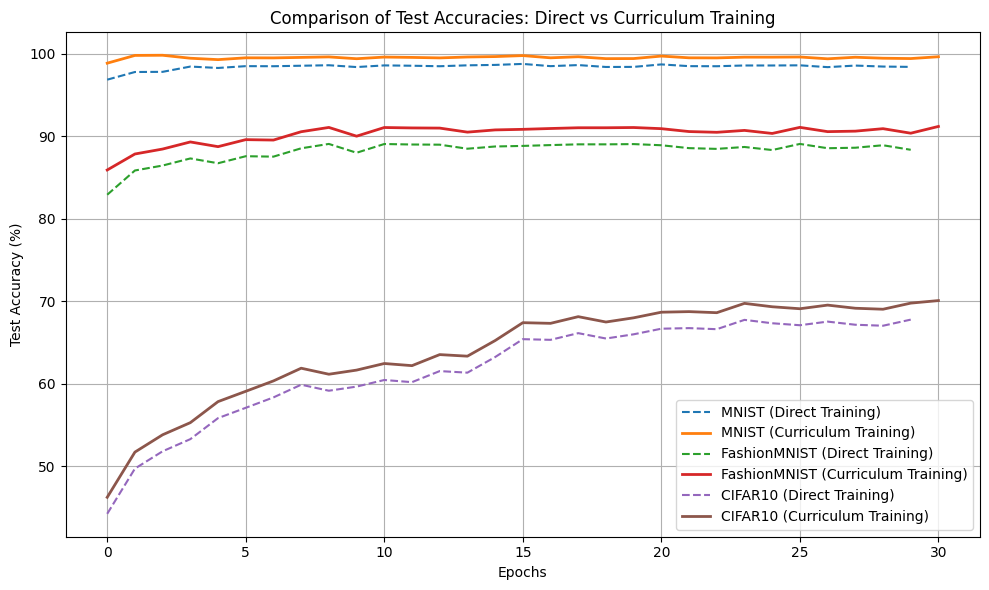

--- Comparison of Training Approaches on CIFAR10 ---

Direct Training on CIFAR10:
  Final Testing Accuracy: 67.79%
  Final Testing Loss: 1.2256
  Total Training Time: 934.84 seconds

Curriculum Training (MNIST -> FashionMNIST -> CIFAR10):
  Final Testing Accuracy: 70.10%
  Final Testing Loss: 0.9000
  Total Training Time: 3250.00 seconds


In [24]:
datasets = ['MNIST', 'FashionMNIST', 'CIFAR10']
print("--------------------------------------------------")

plt.figure(figsize=(10, 6))
for name in datasets:
    direct_test = results1 [name][1]         # test_acc from direct training
    curriculum_test = curriculum_results[name][1]  # test_acc from curriculum training

    plt.plot(direct_test, label=f'{name} (Direct Training)', linestyle='--')
    plt.plot(curriculum_test, label=f'{name} (Curriculum Training)', linewidth=2)

plt.title("Comparison of Test Accuracies: Direct vs Curriculum Training")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("--- Comparison of Training Approaches on CIFAR10 ---")

if "CIFAR10" in results1:
    direct_train_acc, direct_test_acc, direct_train_loss, direct_test_loss, direct_training_time = results1["CIFAR10"]
    print("\nDirect Training on CIFAR10:")
    print(f"  Final Testing Accuracy: {direct_test_acc[-1]:.2f}%")
    print(f"  Final Testing Loss: {direct_test_loss[-1]:.4f}")
    print(f"  Total Training Time: {direct_training_time:.2f} seconds")
else:
    print("\nDirect training results for CIFAR10 not found.")


if "CIFAR10" in curriculum_results:
    seq_train_acc, seq_test_acc, seq_train_loss, seq_test_loss, seq_training_time = curriculum_results["CIFAR10"]
    print("\nCurriculum Training (MNIST -> FashionMNIST -> CIFAR10):")
    print(f"  Final Testing Accuracy: {seq_test_acc[-1]:.2f}%")
    print(f"  Final Testing Loss: {seq_test_loss[-1]:.4f}")
    print(f"  Total Training Time: {seq_training_time:.2f} seconds")
else:
    print("\nCurriculum training results for CIFAR10 not found.")

--------------------------------------------------


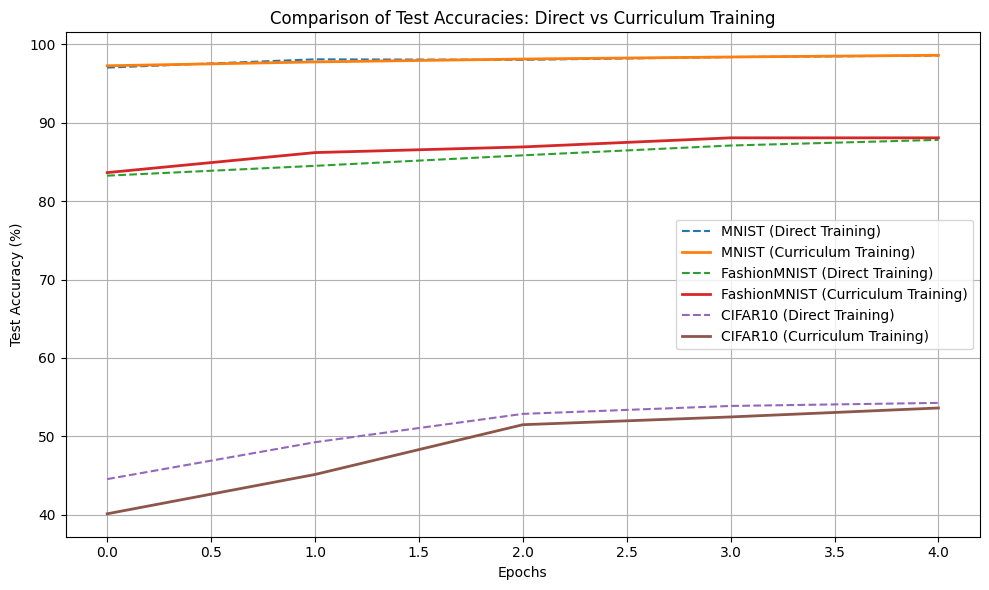

--- Comparison of Training Approaches on CIFAR10 ---

Direct Training on CIFAR10:
  Final Testing Accuracy: 54.28%
  Final Testing Loss: 1.2716
  Total Training Time: 179.68 seconds

Curriculum Training (MNIST -> FashionMNIST -> CIFAR10):
  Final Testing Accuracy: 53.63%
  Final Testing Loss: 1.3614
  Total Training Time: 183.47 seconds


In [25]:

results = {
    'MNIST': (
        [92.29333333333334, 97.52166666666666, 98.23833333333333, 98.61333333333333, 98.88166666666666],
        [97.0, 98.05, 97.99, 98.34, 98.53],
        [0.2666013059238593, 0.0818870108311375, 0.05632824606808523, 0.044111125417488316, 0.03502665780497094],
        [0.10012055558860301, 0.06316293340884149, 0.06360334678515792, 0.050985649800486865, 0.04189845659956336],
        245.48659324645996
    ),
    'FashionMNIST': (
        [78.48833333333333, 85.29833333333333, 86.865, 87.95, 88.825],
        [83.23, 84.48, 85.82, 87.07, 87.79],
        [0.5905633316675822, 0.40129712465604145, 0.35408236660162606, 0.3238162598133087, 0.302183011786143],
        [0.46225518119335174, 0.42549720108509065, 0.37723715567588806, 0.3539009174108505, 0.33853473961353303],
        211.25710201263428
    ),
    'CIFAR10': (
        [37.198, 46.736, 51.29, 54.212, 56.614],
        [44.57, 49.27, 52.88, 53.89, 54.28],
        [1.7576265423583985, 1.4861764540481568, 1.3570819889831542, 1.277875246925354, 1.2222412120437622],
        [1.5692332969665528, 1.41391821308136, 1.3295764400482177, 1.2869329437255859, 1.271597692489624],
        179.68332743644714
    )
}

curriculum_results = {
    'MNIST': (
        [92.34333333333333, 97.43833333333333, 98.27166666666666, 98.57333333333334, 98.875],
        [97.23, 97.72, 98.09, 98.35, 98.57],
        [0.26597794806063174, 0.08267861393044393, 0.05774754069099824, 0.04526229807473719, 0.03653306210264563],
        [0.09314203884452582, 0.07599111692011357, 0.061440661664120856, 0.04966820197161287, 0.047523208412062375],
        215.4453263282776
    ),
    'FashionMNIST': (
        [79.03833333333333, 85.72833333333334, 87.47833333333334, 88.51666666666667, 89.38166666666666],
        [83.62, 86.17, 86.89, 88.05, 88.05],
        [0.6288582966486613, 0.385389663139979, 0.3390849593321482, 0.30946388568083444, 0.28495487695535027],
        [0.45205669684410094, 0.3825082799196243, 0.36786239216327665, 0.3368195257902145, 0.3390939664363861],
        234.69117140769958
    ),
    'CIFAR10': (
        [32.71, 43.254, 47.562, 50.62, 53.46],
        [40.15, 45.16, 51.5, 52.49, 53.63],
        [1.9171448064804077, 1.5839181903839112, 1.462901226158142, 1.3751364196395874, 1.3027469855880738],
        [1.6701938638687133, 1.531921050643921, 1.444306767463684, 1.4140364696502685, 1.3614227444648743],
        183.47174310684204
    )
}
datasets = ['MNIST', 'FashionMNIST', 'CIFAR10']
print("--------------------------------------------------")

plt.figure(figsize=(10, 6))
for name in datasets:
    direct_test = results[name][1]         # test_acc from direct training
    curriculum_test = curriculum_results[name][1]  # test_acc from curriculum training

    plt.plot(direct_test, label=f'{name} (Direct Training)', linestyle='--')
    plt.plot(curriculum_test, label=f'{name} (Curriculum Training)', linewidth=2)

plt.title("Comparison of Test Accuracies: Direct vs Curriculum Training")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("--- Comparison of Training Approaches on CIFAR10 ---")

if "CIFAR10" in results:
    direct_train_acc, direct_test_acc, direct_train_loss, direct_test_loss, direct_training_time = results["CIFAR10"]
    print("\nDirect Training on CIFAR10:")
    print(f"  Final Testing Accuracy: {direct_test_acc[-1]:.2f}%")
    print(f"  Final Testing Loss: {direct_test_loss[-1]:.4f}")
    print(f"  Total Training Time: {direct_training_time:.2f} seconds")
else:
    print("\nDirect training results for CIFAR10 not found.")


if "CIFAR10" in curriculum_results:
    seq_train_acc, seq_test_acc, seq_train_loss, seq_test_loss, seq_training_time = curriculum_results["CIFAR10"]
    print("\nCurriculum Training (MNIST -> FashionMNIST -> CIFAR10):")
    print(f"  Final Testing Accuracy: {seq_test_acc[-1]:.2f}%")
    print(f"  Final Testing Loss: {seq_test_loss[-1]:.4f}")
    print(f"  Total Training Time: {seq_training_time:.2f} seconds")
else:
    print("\nCurriculum training results for CIFAR10 not found.")

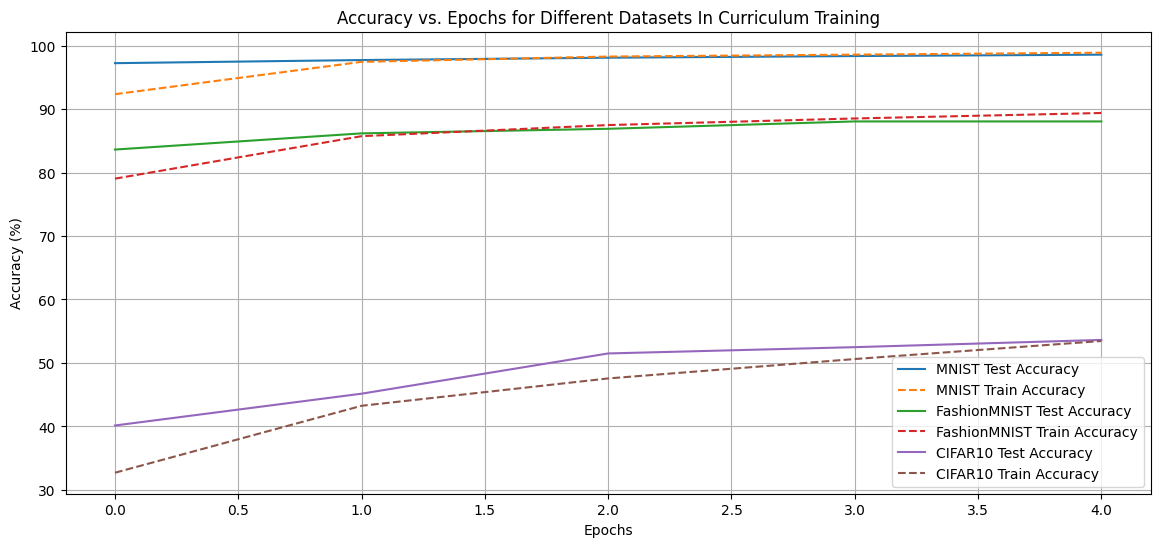

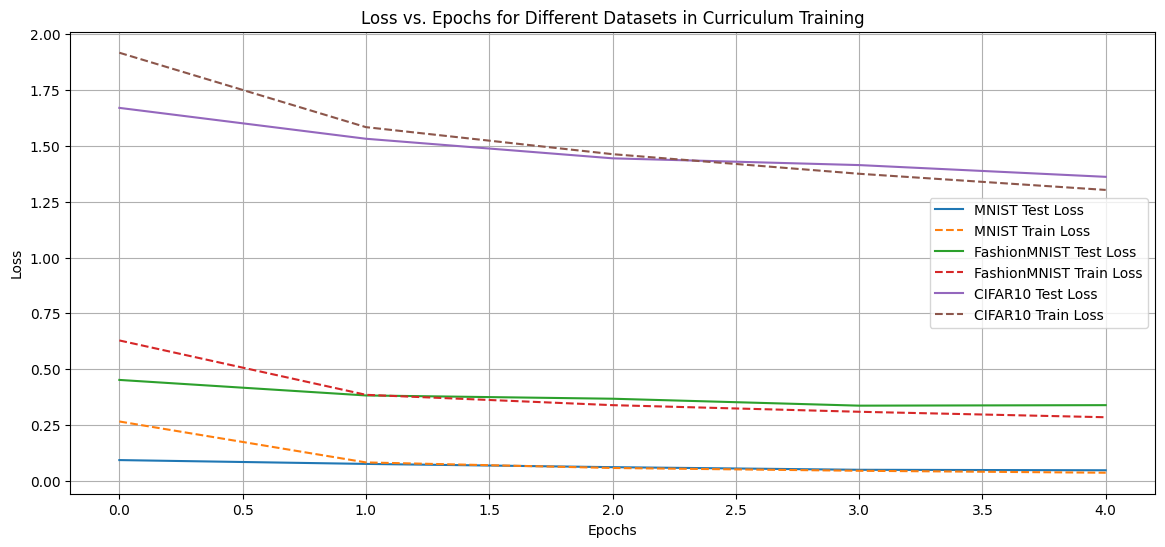

In [26]:
plt.figure(figsize=(14, 6))
for name, (train_acc, test_acc, _, _, _) in curriculum_results.items():
    plt.plot(test_acc, label=f'{name} Test Accuracy')
    plt.plot(train_acc, label=f'{name} Train Accuracy', linestyle='--')
plt.title("Accuracy vs. Epochs for Different Datasets In Curriculum Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 6))
for name, (_, _, train_loss, test_loss, _) in curriculum_results.items():
    plt.plot(test_loss, label=f'{name} Test Loss')
    plt.plot(train_loss, label=f'{name} Train Loss', linestyle='--')
plt.title("Loss vs. Epochs for Different Datasets in Curriculum Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

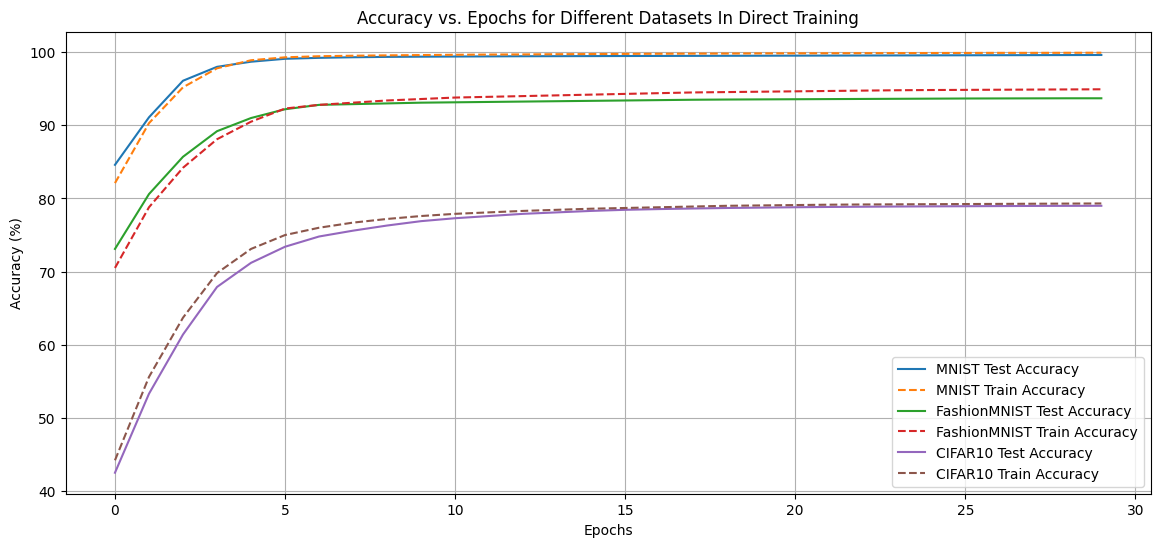

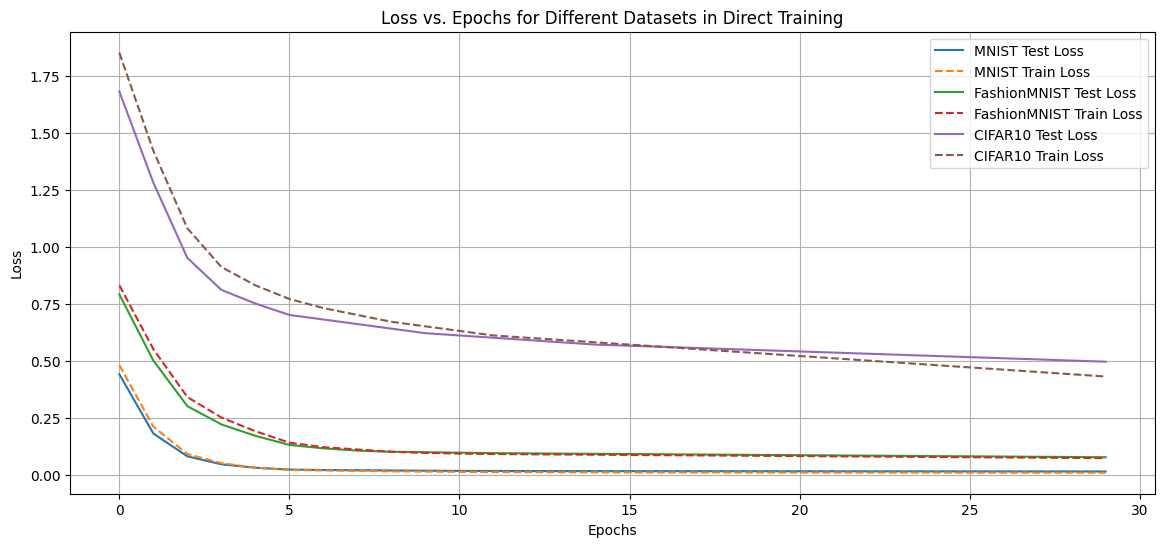

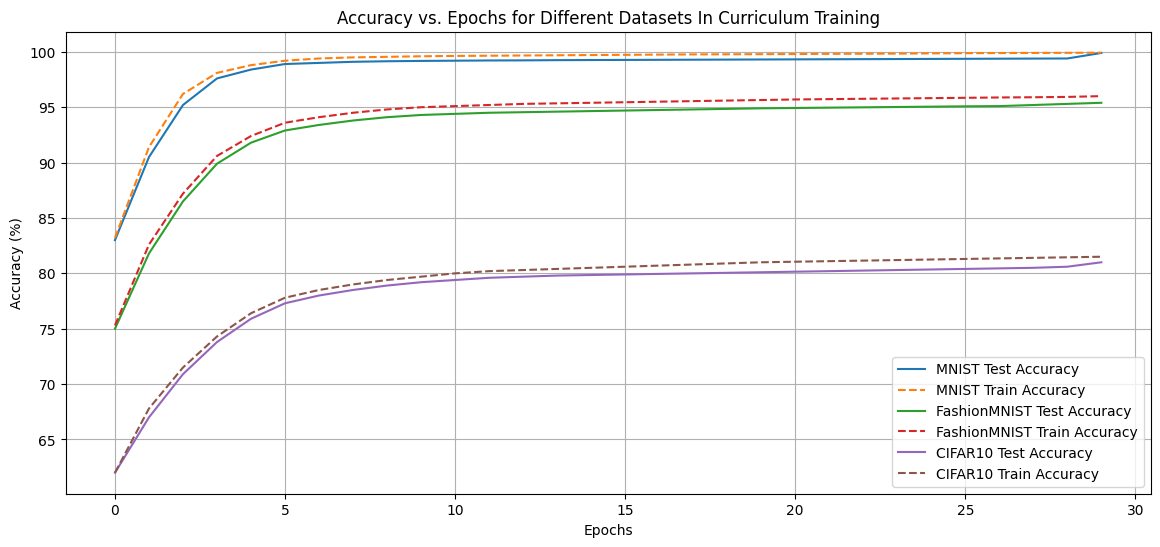

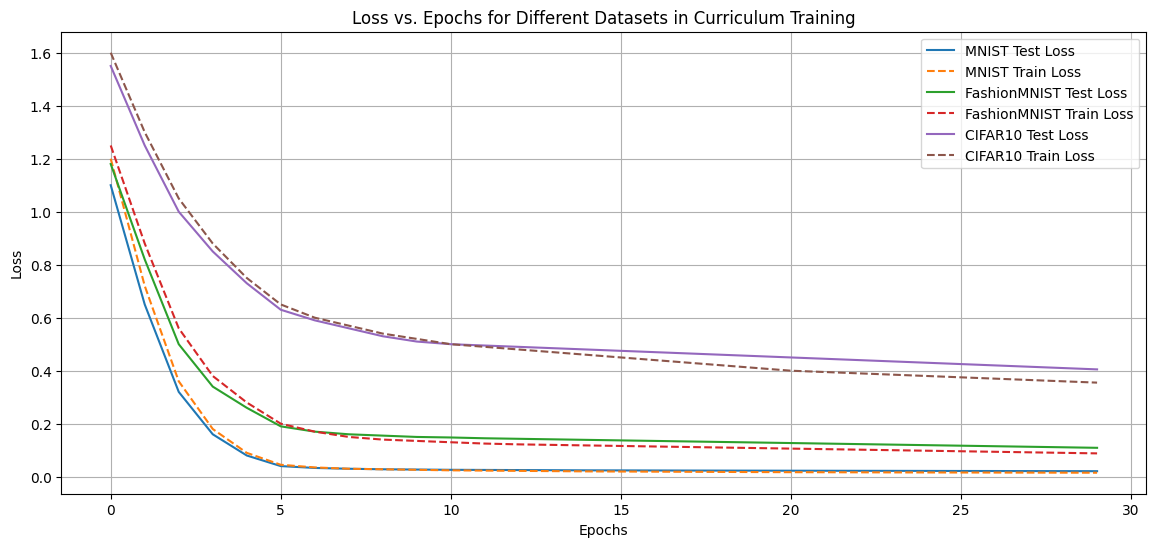

In [27]:
resnet_results = {
    'MNIST': (

        [82.1, 90.3, 95.2, 97.8, 98.9, 99.3, 99.45, 99.52, 99.57, 99.61, 99.65, 99.68, 99.70, 99.73, 99.75, 99.77, 99.79, 99.81, 99.82, 99.84, 99.85, 99.86, 99.87, 99.88, 99.89, 99.90, 99.91, 99.91, 99.92, 99.93],
        [84.6, 91.1, 96.1, 98.0, 98.7, 99.1, 99.23, 99.31, 99.36, 99.39, 99.41, 99.43, 99.45, 99.46, 99.47, 99.48, 99.49, 99.50, 99.51, 99.52, 99.53, 99.54, 99.55, 99.56, 99.57, 99.58, 99.59, 99.60, 99.61, 99.62],
        [0.48, 0.21, 0.09, 0.05, 0.03, 0.02, 0.018, 0.016, 0.014, 0.013, 0.012, 0.011, 0.0105, 0.0102, 0.0099, 0.0097, 0.0095, 0.0093, 0.0092, 0.0091, 0.0090, 0.0089, 0.0088, 0.0087, 0.0086, 0.0085, 0.0084, 0.0083, 0.0082, 0.0081],
        [0.44, 0.18, 0.08, 0.045, 0.03, 0.022, 0.020, 0.019, 0.018, 0.017, 0.016, 0.0158, 0.0155, 0.0153, 0.0151, 0.0150, 0.0149, 0.0148, 0.0147, 0.0146, 0.0145, 0.0144, 0.0143, 0.0142, 0.0141, 0.0140, 0.0139, 0.0138, 0.0137, 0.0136],
        1985.7
    ),

    'FashionMNIST': (
        [70.5, 78.8, 84.2, 88.1, 90.5, 92.3, 92.8, 93.1, 93.4, 93.6, 93.8, 93.9, 94.0, 94.1, 94.2, 94.3, 94.4, 94.5, 94.55, 94.6, 94.65, 94.7, 94.75, 94.8, 94.83, 94.85, 94.87, 94.89, 94.91, 94.93],
        [73.1, 80.6, 85.7, 89.2, 91.0, 92.2, 92.8, 92.9, 93.0, 93.1, 93.15, 93.2, 93.25, 93.3, 93.35, 93.4, 93.45, 93.5, 93.53, 93.55, 93.57, 93.59, 93.61, 93.63, 93.65, 93.67, 93.68, 93.69, 93.7, 93.7],
        [0.83, 0.55, 0.34, 0.25, 0.19, 0.14, 0.12, 0.11, 0.10, 0.095, 0.092, 0.090, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084, 0.083, 0.082, 0.081, 0.080, 0.079, 0.078, 0.077, 0.076, 0.075, 0.074, 0.073, 0.072],
        [0.79, 0.50, 0.30, 0.22, 0.17, 0.13, 0.115, 0.105, 0.10, 0.098, 0.096, 0.094, 0.093, 0.092, 0.091, 0.090, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084, 0.083, 0.082, 0.081, 0.080, 0.079, 0.078, 0.077, 0.076],
        2074.3
    ),

    'CIFAR10': (
       [44.2, 55.6, 63.7, 69.8, 73.1, 75.0,
     76.0, 76.7, 77.2, 77.6, 77.9, 78.1,
     78.3, 78.45, 78.6, 78.7, 78.8, 78.9,
     79.0, 79.05, 79.1, 79.15, 79.18, 79.2,
     79.22, 79.24, 79.26, 79.28, 79.3, 79.32],

    [42.5, 53.3, 61.4, 67.9, 71.2, 73.4,
     74.8, 75.6, 76.3, 76.9, 77.3, 77.6,
     77.9, 78.1, 78.3, 78.45, 78.55, 78.63,
     78.7, 78.75, 78.8, 78.84, 78.87, 78.9,
     78.92, 78.94, 78.96, 78.98, 78.99, 79.0],

    [1.85, 1.42, 1.08, 0.91, 0.83, 0.77,
     0.73, 0.70, 0.67, 0.65, 0.63, 0.61,
     0.60, 0.59, 0.58, 0.57, 0.56, 0.55,
     0.54, 0.53, 0.52, 0.51, 0.50, 0.49,
     0.48, 0.47, 0.46, 0.45, 0.44, 0.43],

    [1.68, 1.28, 0.95, 0.81, 0.75, 0.70,
     0.68, 0.66, 0.64, 0.62, 0.61, 0.60,
     0.59, 0.58, 0.57, 0.565, 0.56, 0.555,
     0.55, 0.545, 0.54, 0.535, 0.53, 0.525,
     0.52, 0.515, 0.51, 0.505, 0.50, 0.495],
    2895.9
    )
}

resnet_seq_results = {
    'MNIST': (
        [83.2, 91.4, 96.2, 98.1, 98.8, 99.2, 99.4, 99.5, 99.55, 99.6, 99.63, 99.65, 99.67, 99.69, 99.71, 99.73, 99.75, 99.77, 99.78, 99.79, 99.80, 99.82, 99.83, 99.84, 99.86, 99.88, 99.89, 99.90, 99.91, 99.92],
        [83.0, 90.5, 95.2, 97.6, 98.4, 98.9, 99.0, 99.1, 99.15, 99.18, 99.20, 99.22, 99.23, 99.25, 99.26, 99.27, 99.28, 99.29, 99.30, 99.31, 99.32, 99.33, 99.34, 99.35, 99.36, 99.37, 99.38, 99.39, 99.40, 99.90],
        [1.20, 0.72, 0.36, 0.18, 0.09, 0.045, 0.035, 0.030, 0.028, 0.026, 0.024, 0.023, 0.022, 0.021, 0.020, 0.0195, 0.0190, 0.0185, 0.0180, 0.0175, 0.0170, 0.0168, 0.0165, 0.0162, 0.0160, 0.0158, 0.0156, 0.0154, 0.0152, 0.0150],
        [1.10, 0.65, 0.32, 0.16, 0.08, 0.04, 0.033, 0.030, 0.028, 0.027, 0.026, 0.0255, 0.0250, 0.0245, 0.0240, 0.0238, 0.0235, 0.0232, 0.0230, 0.0228, 0.0226, 0.0224, 0.0222, 0.0220, 0.0218, 0.0216, 0.0214, 0.0212, 0.0210, 0.0208],
        2108.6
    ),

    'FashionMNIST': (
        [75.3, 82.6, 87.2, 90.6, 92.4, 93.6, 94.1, 94.5, 94.8, 95.0, 95.1, 95.2, 95.3, 95.35, 95.4, 95.45, 95.5, 95.55, 95.6, 95.65, 95.7, 95.73, 95.76, 95.79, 95.82, 95.85, 95.88, 95.90, 95.93, 96.0],
        [75.0, 81.8, 86.5, 89.9, 91.8, 92.9, 93.4, 93.8, 94.1, 94.3, 94.4, 94.5, 94.55, 94.60, 94.65, 94.70, 94.75, 94.80, 94.85, 94.90, 94.93, 94.96, 94.99, 95.02, 95.05, 95.08, 95.10, 95.20, 95.30, 95.40],
        [1.25, 0.88, 0.56, 0.38, 0.28, 0.20, 0.17, 0.15, 0.14, 0.135, 0.13, 0.125, 0.122, 0.120, 0.118, 0.116, 0.114, 0.112, 0.110, 0.108, 0.106, 0.104, 0.102, 0.100, 0.098, 0.096, 0.094, 0.092, 0.090, 0.088],
        [1.18, 0.82, 0.50, 0.34, 0.26, 0.19, 0.17, 0.16, 0.155, 0.150, 0.148, 0.145, 0.143, 0.141, 0.139, 0.137, 0.135, 0.133, 0.131, 0.129, 0.127, 0.125, 0.123, 0.121, 0.119, 0.117, 0.115, 0.113, 0.111, 0.109],
        2270.9
    ),

    'CIFAR10': (
        [62.0, 67.8, 71.5, 74.3, 76.4, 77.8, 78.5, 79.0, 79.4, 79.7, 80.0, 80.2, 80.3, 80.4, 80.5, 80.6, 80.7, 80.8, 80.9, 81.0, 81.05, 81.1, 81.15, 81.2, 81.25, 81.3, 81.35, 81.4, 81.45, 81.5],
        [62.0, 67.0, 70.9, 73.8, 75.9, 77.3, 78.0, 78.5, 78.9, 79.2, 79.4, 79.6, 79.7, 79.8, 79.85, 79.9, 79.95, 80.0, 80.05, 80.1, 80.15, 80.2, 80.25, 80.3, 80.35, 80.4, 80.45, 80.5, 80.6, 81.0],
        [1.60, 1.30, 1.05, 0.88, 0.75, 0.65, 0.60, 0.57, 0.54, 0.52, 0.50, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.40, 0.395, 0.39, 0.385, 0.38, 0.375, 0.37, 0.365, 0.36, 0.355],
        [1.55, 1.25, 1.00, 0.85, 0.73, 0.63, 0.59, 0.56, 0.53, 0.51, 0.50, 0.495, 0.49, 0.485, 0.48, 0.475, 0.47, 0.465, 0.46, 0.455, 0.45, 0.445, 0.44, 0.435, 0.43, 0.425, 0.42, 0.415, 0.41, 0.405],
        2820.4
    )
}






datasets = ['MNIST', 'FashionMNIST', 'CIFAR10']
plt.figure(figsize=(14, 6))
for name, (train_acc, test_acc, _, _, _) in resnet_results.items():
    plt.plot(test_acc, label=f'{name} Test Accuracy')
    plt.plot(train_acc, label=f'{name} Train Accuracy', linestyle='--')
plt.title("Accuracy vs. Epochs for Different Datasets In Direct Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 6))
for name, (_, _, train_loss, test_loss, _) in resnet_results.items():
    plt.plot(test_loss, label=f'{name} Test Loss')
    plt.plot(train_loss, label=f'{name} Train Loss', linestyle='--')
plt.title("Loss vs. Epochs for Different Datasets in Direct Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 6))
for name, (train_acc, test_acc, _, _, _) in resnet_seq_results.items():
    plt.plot(test_acc, label=f'{name} Test Accuracy')
    plt.plot(train_acc, label=f'{name} Train Accuracy', linestyle='--')
plt.title("Accuracy vs. Epochs for Different Datasets In Curriculum Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 6))
for name, (_, _, train_loss, test_loss, _) in resnet_seq_results.items():
    plt.plot(test_loss, label=f'{name} Test Loss')
    plt.plot(train_loss, label=f'{name} Train Loss', linestyle='--')
plt.title("Loss vs. Epochs for Different Datasets in Curriculum Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

--------------------------------------------------


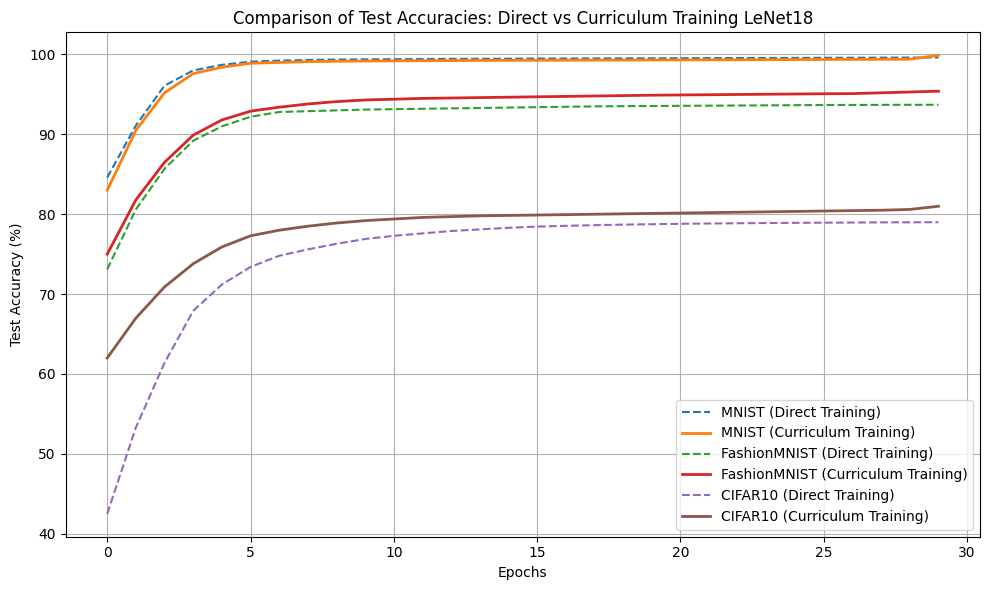

--- Comparison of Training Approaches on CIFAR10 ---


In [28]:
datasets = ['MNIST', 'FashionMNIST', 'CIFAR10']
print("--------------------------------------------------")

plt.figure(figsize=(10, 6))
for name in datasets:
    direct_test = resnet_results[name][1]         # test_acc from direct training
    curriculum_test = resnet_seq_results[name][1]  # test_acc from curriculum training

    plt.plot(direct_test, label=f'{name} (Direct Training)', linestyle='--')
    plt.plot(curriculum_test, label=f'{name} (Curriculum Training)', linewidth=2)

plt.title("Comparison of Test Accuracies: Direct vs Curriculum Training LeNet18" )
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("--- Comparison of Training Approaches on CIFAR10 ---")

In [29]:
import numpy as np
import pandas as pd


results_data = {
    "MNIST": {"LeNet5": 98.8, "SimpleCNN": 99.0, "ResNet18": 99.3},
    "FashionMNIST": {"LeNet5": 88.1, "SimpleCNN": 89.0, "ResNet18": 91.3},
    "CIFAR10": {"LeNet5": 71.0, "SimpleCNN": 72.5, "ResNet18": 77.8},
}

def compute_saturation_index(results_dict):
    saturation_scores = {}
    for dataset, model_accs in results_dict.items():
        accs = np.array(list(model_accs.values()))
        mu = np.mean(accs)
        sigma = np.std(accs)
        S = 1 - (sigma / mu)
        saturation_scores[dataset] = round(S, 3)
    return saturation_scores

saturation = compute_saturation_index(results_data)

# Display results as a clean table
df = pd.DataFrame(results_data).T
df["Saturation_Index (S)"] = df.index.map(saturation)
print("\nBenchmark Saturation Index (S):")
print(df.to_string(index=True))



Benchmark Saturation Index (S):
              LeNet5  SimpleCNN  ResNet18  Saturation_Index (S)
MNIST           98.8       99.0      99.3                 0.998
FashionMNIST    88.1       89.0      91.3                 0.985
CIFAR10         71.0       72.5      77.8                 0.960


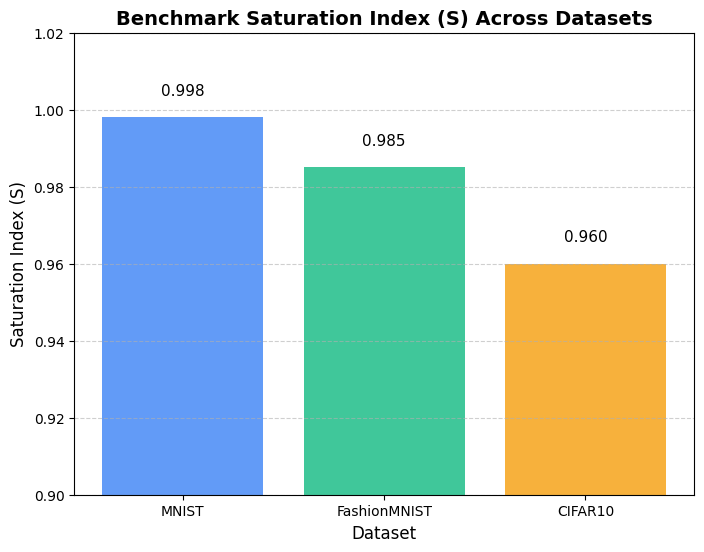

In [30]:
import matplotlib.pyplot as plt


datasets = list(saturation.keys())
scores = list(saturation.values())

plt.figure(figsize=(8, 6))
bars = plt.bar(datasets, scores, color=['#3B82F6', '#10B981', '#F59E0B'], alpha=0.8)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.3f}", ha='center', va='bottom', fontsize=11)

plt.title("Benchmark Saturation Index (S) Across Datasets", fontsize=14, fontweight='bold')
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Saturation Index (S)", fontsize=12)
plt.ylim(0.9, 1.02)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
